In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os
import time

In [2]:
PATH = 'data_files/datalog_2021_01_20_12_25_50_CST_.h5'

In [3]:
file = h5py.File(PATH, 'r')

In [4]:
file.keys()

<KeysViewHDF5 ['_header', 'configs', 'messages', 'packets']>

In [5]:
file['packets']

<HDF5 dataset "packets": shape (741168,), type "|V36">

In [6]:
packets = file['packets']
packets[:30]

array([(1, 1, 1, 2, 0, 1, 1, 58,          9, 0, 0, 0, 0, 122,   2, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 0, 1, 61,        965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 0, 1, 59,         33, 0, 0, 0, 0, 123,   8, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 0, 1,  1,         17, 0, 0, 0, 0,  65,   4, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 1, 1, 18,        741, 0, 0, 0, 0,  82, 185, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 0, 1, 19,        165, 0, 0, 0, 0,  83,  41, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 0, 1, 61,        965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 2, 0, 1, 1,  1,         62, 0, 0, 0, 0, 129,  15, 0, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 3, 0, 0, 1,  0,          0, 0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,      0),
       (1, 0, 0, 4, 0, 0, 0,  0, 1604113957, 0, 0, 0, 0,   0,   0, 1, 0, 0, 0, 0, 0,      0),
       (1, 1, 2, 3, 1, 0, 1,  0,         64, 0, 0, 0, 0,   0

In [7]:
np.unique(packets['channel_id'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=uint8)

In [8]:
channel1 = packets[packets['channel_id'] == 1]

In [9]:
channel1

array([(1, 1, 2, 2, 0, 0, 1, 1,        17,   0, 0, 0, 0,  65,   4, 0, 0, 0, 0, 0, 0,         0),
       (1, 1, 2, 2, 0, 1, 1, 1,        62,   0, 0, 0, 0, 129,  15, 0, 0, 0, 0, 0, 0,         0),
       (1, 1, 2, 3, 0, 1, 1, 1,         0,   0, 0, 0, 0,   1,   0, 0, 0, 0, 0, 0, 0,         0),
       ...,
       (1, 1, 2, 0, 1, 1, 1, 1, 153195717, 230, 0, 0, 0,  65,  49, 1, 0, 0, 0, 0, 1, 153657867),
       (1, 1, 2, 0, 1, 0, 1, 1, 153201147, 240, 0, 0, 0, 193, 126, 1, 0, 0, 0, 0, 1, 153664939),
       (1, 1, 2, 0, 1, 0, 1, 1, 153206589, 244, 0, 0, 0,  65, 207, 1, 0, 0, 0, 0, 1, 153674187)],
      dtype=[('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), (

In [10]:
channels = []

for i in range(0, 64):
    channels.append(packets[packets['channel_id'] == i])

In [11]:
channels[1][:30]

array([(1, 1, 2, 2, 0, 0, 1, 1,      17,   0, 0, 0, 0,  65,   4, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 2, 0, 1, 1, 1,      62,   0, 0, 0, 0, 129,  15, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 3, 0, 1, 1, 1,       0,   0, 0, 0, 0,   1,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 3, 0, 0, 1, 1,       1,   0, 0, 0, 0,  65,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 3, 0, 0, 1, 1,       2,   0, 0, 0, 0, 129,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 3, 0, 1, 1, 1,       3,   0, 0, 0, 0, 193,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 1, 2, 0, 1, 0, 1, 1, 1118011, 249, 0, 0, 0, 193, 206, 1, 0, 0, 0, 0, 1, 1423547),
       (1, 1, 2, 0, 1, 0, 1, 1, 1121258, 245, 0, 0, 0, 129, 250, 1, 0, 0, 0, 0, 1, 1443947),
       (1, 1, 2, 0, 1, 1, 1, 1, 1125622, 223, 0, 0, 0, 129,  61, 1, 0, 0, 0, 0, 1, 1465163),
       (1, 1, 2, 0, 1, 1, 1, 1, 1219202, 245, 0, 0, 0, 129, 160, 1, 0, 0, 0, 0, 1, 1467339),
       (1, 1, 2, 0, 1, 1, 1, 1, 1224292, 231, 0, 0, 0,   1, 153, 1, 0,

In [12]:
# current = int(f(ADC) / delta(timestamp))
# plot histograms for each channel

currents_channels = []

for i in range(0, 64):
    arr = []
    for j in range(1, channels[i].size):
        arr.append(1000 * channels[i]['dataword'][j] / (channels[i]['timestamp'][j] - channels[i]['timestamp'][j - 1]))
    currents_channels.append(arr)

currents_channels = [[x for x in currents_channels[i] if str(x) != 'nan'] for i in range(0, 64)]
currents_channels = [[x for x in currents_channels[i] if str(x) != 'inf'] for i in range(0, 64)]
currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]
currents_channels = [[int(x) for x in currents_channels[i]] for i in range(0, 64)]
currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]

<ipython-input-12-231bb216340f>:9: RuntimeWarning: overflow encountered in ulong_scalars
  arr.append(1000 * channels[i]['dataword'][j] / (channels[i]['timestamp'][j] - channels[i]['timestamp'][j - 1]))
<ipython-input-12-231bb216340f>:9: RuntimeWarning: invalid value encountered in true_divide
  arr.append(1000 * channels[i]['dataword'][j] / (channels[i]['timestamp'][j] - channels[i]['timestamp'][j - 1]))
<ipython-input-12-231bb216340f>:9: RuntimeWarning: divide by zero encountered in true_divide
  arr.append(1000 * channels[i]['dataword'][j] / (channels[i]['timestamp'][j] - channels[i]['timestamp'][j - 1]))


(array([1.153e+03, 2.530e+02, 9.050e+02, 2.940e+02, 8.250e+02, 1.087e+03,
        8.180e+02, 4.980e+02, 2.810e+02, 1.580e+02, 2.310e+02, 7.900e+01,
        6.900e+01, 6.000e+00, 1.100e+01, 1.100e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1. ,  14.7,  28.4,  42.1,  55.8,  69.5,  83.2,  96.9, 110.6,
        124.3, 138. , 151.7, 165.4, 179.1, 192.8, 206.5, 220.2, 233.9,
        247.6, 261.3, 275. ]),
 <BarContainer object of 20 artists>)

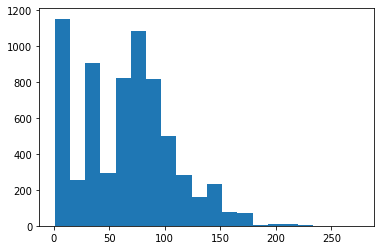

In [13]:
plt.hist(currents_channels[50], bins = 20)

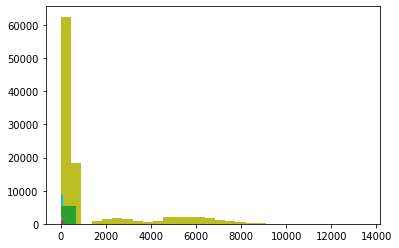

In [14]:
for i in range(0, 64):
    plt.hist(currents_channels[i], bins = 20)
#plt.xscale('log')

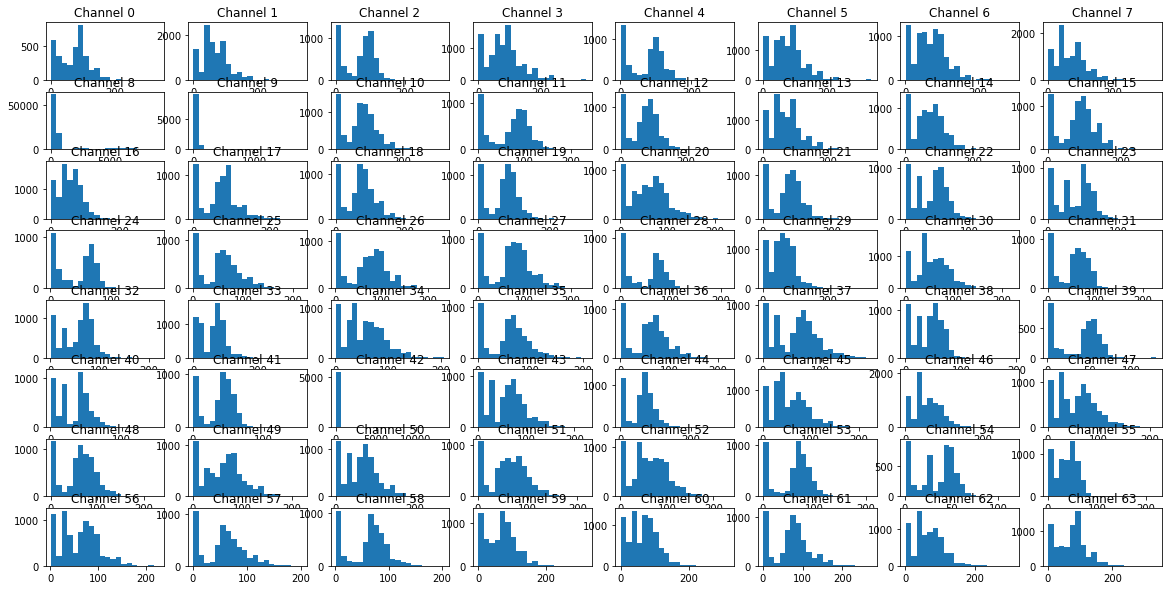

In [15]:
fig, axes = plt.subplots(8, 8, figsize = (20,10))

count = 0
for i in range(0, 8):
    for j in range(0, 8):
        axes[i][j].set_title('Channel ' + str(count))
        axes[i][j].hist(currents_channels[count], bins = 20)
        count += 1

plt.show()

opening /Users/jamesdeleon/Documents/larpix/Project_LArPix/larpix_data_files/test_files/datalog_2021_01_20_12_25_50_CST_.h5
chip: 2.0	channel: 0.0	rate: 70.99	leakage: 8882.48
chip: 2.0	channel: 1.0	rate: 87.89	leakage: 10997.01
chip: 2.0	channel: 2.0	rate: 45.37	leakage: 5676.28
chip: 2.0	channel: 3.0	rate: 80.19	leakage: 10033.58
chip: 2.0	channel: 4.0	rate: 43.93	leakage: 5496.94
chip: 2.0	channel: 5.0	rate: 85.11	leakage: 10648.75
chip: 2.0	channel: 6.0	rate: 69.03	leakage: 8637.45
chip: 2.0	channel: 7.0	rate: 84.74	leakage: 10602.88
chip: 2.0	channel: 8.0	rate: 841.20	leakage: 105250.94
chip: 2.0	channel: 9.0	rate: 82.80	leakage: 10359.94
chip: 2.0	channel: 10.0	rate: 62.31	leakage: 7796.02
chip: 2.0	channel: 11.0	rate: 47.32	leakage: 5920.26
chip: 2.0	channel: 12.0	rate: 52.04	leakage: 6511.45
chip: 2.0	channel: 13.0	rate: 80.88	leakage: 10120.12
chip: 2.0	channel: 14.0	rate: 59.57	leakage: 7452.98
chip: 2.0	channel: 15.0	rate: 62.61	leakage: 7833.55
chip: 2.0	channel: 16.0	rate:

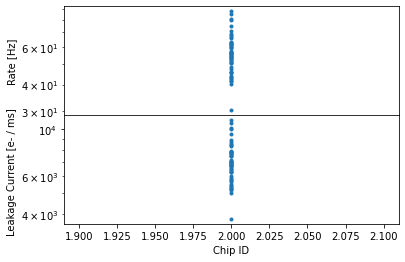

In [30]:

import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import norm, mode
import sys
import time

threshold = 128
gain = 4 # mV /ke-
runtime = 120
lsb = 3.91
#vref = 1.546 V
#vcm = 544 mV

nonrouted_channels = [6,7,8,9,
                      22,23,24,25,
                      38,39,40,
                      54,55,56,57]

def unique_channel_id(io_group, io_channel, chip_id, channel_id):
    return channel_id + 64 * (chip_id + 255 * (io_channel + 255 * (io_group)))

def plot_summary(data):
    parameters = {'axes.labelseize' : 15,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15 }
    plot_exists = plt.fignum_exists('summary')
    if plot_exists:
        fig = plt.figure('summary')
        axes = fig.axes
    else:
        fig,axes = plt.subplots(2, 1, sharex = 'col', num = 'summary')
    fig.subplots_adjust(hspace = 0)

    channels = [(channel // 64) % 255 for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]
    ch_rate = [data[channel]['rate'] for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]
    ch_leakage = [data[channel]['leakage'] for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]

    axes[0].plot(channels,ch_rate,'.')
    axes[1].plot(channels,ch_leakage,'.')
    axes[1].set(xlabel = 'Chip ID')
    axes[0].set(ylabel = 'Rate [Hz]')
    axes[1].set(ylabel = 'Leakage Current [e- / ms] ')
    axes[0].set(yscale = 'log')
    axes[1].set(yscale = 'log')
    plt.show()

    

def main():
    filename = PATH
    print('opening',filename)
    plt.ion()
    f = h5py.File(filename,'r')

    data_mask = f['packets'][:]['packet_type'] == 0
    valid_parity_mask = f['packets'][data_mask]['valid_parity'] == 1
    good_data = (f['packets'][data_mask])[valid_parity_mask]

    io_group = good_data['io_group'].astype(np.uint64)
    io_channel = good_data['io_channel'].astype(np.uint64)
    chip_id = good_data['chip_id'].astype(np.uint64)
    channel_id = good_data['channel_id'].astype(np.uint64)
    unique_channels = set(unique_channel_id(io_group, io_channel, chip_id, channel_id))
    
    data = dict()
    for channel in sorted(unique_channels):
        channel_mask = unique_channel_id(io_group, io_channel, chip_id, channel_id) == channel
        timestamp = good_data[channel_mask]['timestamp']
        adc = good_data[channel_mask]['dataword']
        rate_i = len(adc) / runtime

        data[channel] = dict(
            channel_mask = channel_mask,
            timestamp = timestamp,
            adc = adc,
            rate = rate_i,
            leakage = (rate_i) * threshold * lsb * (1000 / gain) / 1000 # e- / ms
            )
        if rate_i > 20:
            print('chip: {}\tchannel: {}\trate: {:.02f}\tleakage: {:.02f}'.format((channel // 64) % 255, channel % 64, data[channel]['rate'], data[channel]['leakage']))
    return data
                  
if __name__ == '__main__':
    data = main()
    #print(data)
    plot_summary(data)
    #time.sleep(10)